# Image Classification with MNIST Dataset

In [14]:
import tensorflow as tf

In [15]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

8


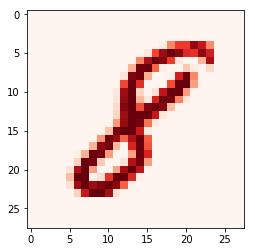

In [16]:
import matplotlib.pyplot as plt
image_index=7777 #You may select anything upto 60,000
print(y_train[image_index]) #The label is 8
plt.imshow(x_train[image_index],cmap='Reds')

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
x_test.shape

(10000, 28, 28)

In [19]:
#Reshaping the array to 4-dims so that it can work with Keras API
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)
#Making sure that values are float so that we can get decimal point after dividing
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
#Normalising the RGB codes by dividing into max RGB value
x_train/=255 #Dividing by 255 to map it to max RGB Nos. as there as 255 colors b/w R to B
x_test/=255
print('x_train shape:',x_train.shape)
print('Number of images in x_train',x_train.shape[0])
print('Number of images in x_test',x_test.shape[0])




x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [20]:
#Import the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D

In [21]:
#Creating a sequential model and adding the layers
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) #Flattening the 2D arrays for fully connected layers
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [22]:
help(Dropout)

Help on class Dropout in module keras.layers.core:

class Dropout(keras.engine.base_layer.Layer)
 |  Applies Dropout to the input.
 |  
 |  Dropout consists in randomly setting
 |  a fraction `rate` of input units to 0 at each update during training time,
 |  which helps prevent overfitting.
 |  
 |  # Arguments
 |      rate: float between 0 and 1. Fraction of the input units to drop.
 |      noise_shape: 1D integer tensor representing the shape of the
 |          binary dropout mask that will be multiplied with the input.
 |          For instance, if your inputs have shape
 |          `(batch_size, timesteps, features)` and
 |          you want the dropout mask to be the same for all timesteps,
 |          you can use `noise_shape=(batch_size, 1, features)`.
 |      seed: A Python integer to use as random seed.
 |  
 |  # References
 |      - [Dropout: A Simple Way to Prevent Neural Networks from Overfitting]
 |        (http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.p

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.1970 - acc: 0.9404
Epoch 2/10
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0802 - acc: 0.9757
Epoch 3/10
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0553 - acc: 0.9827
Epoch 4/10
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0411 - acc: 0.9869
Epoch 5/10
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0334 - acc: 0.9890
Epoch 6/10
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0276 - acc: 0.9908
Epoch 7/10
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0242 - acc: 0.9919 8s - loss: 0.
Epoch 8/10
60000/60000 [==============================] - 154s 3ms/step - loss: 0.0211 - acc: 0.9925
Epoch 9/10
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0176 - acc: 0.9940
Epoch 10/10
60000/60000 [==============================] - 159s 3ms/step - lo

In [13]:
#Evaluate the model
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 17s 2ms/step


[0.06897964853864233, 0.9837]

6


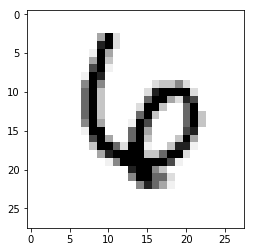

In [25]:
image_index=22
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
pred=model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())